[Home](../../README.md)
## Model Training - Poker Hand Strength & Action Prediction

This project focuses on training a Logistic Regression model (or another regression model, depending on the setup) to predict poker actions such as **Fold**, **Check**, **Call**, **Raise**, and **All-in**. The predictions are based on features derived from poker hands, including card ranks, suits, and hand strength estimations.

### Objectives

1. Load the dataset containing features and corresponding actions.
2. Train a Logistic Regression model to predict the probability of each action.
3. Save the trained model for future use.

### Context

The goal is to predict the most likely actions a player will take based on the strength of their hand. Features include:

- **Ranks** and **suits** of the cards.
- Engineered features like **Hand Type**, **Hand Strength**, and **Max Rank Frequency**.


#### Step 1

Load the required dependencies:

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



### Step 2: Define Input Features and Target Variables

We select relevant features (e.g., hand strength, hand type) as inputs, and use the action probabilities (Fold, Check, Call, Raise, All-In) as multi-output targets.

In [10]:
training_data = pd.read_csv('training_data.csv')
# Display to verify
print("✅ Loaded training data:")
print(training_data.head())

✅ Loaded training data:
   Suit of Card 1  Suit of Card 2  Suit of Card 3  Suit of Card 4  \
0               0               1               0               0   
1               0               0               0               0   
2               0               0               1               0   
3               0               0               1               1   
4               0               0               1               0   

   Suit of Card 5  Rank of Card 1  Rank of Card 2  Rank of Card 3  \
0               0               3               4               8   
1               0              11               7              13   
2               0               6               6              12   
3               1               4               7               8   
4               0              13               5              10   

   Rank of Card 4  Rank of Card 5  Poker Hand  Unique Ranks  Unique Suits  \
0               8               3           3             3          

In [11]:
# Define feature columns
features = ['Hand Strength', 'Unique Ranks', 'Unique Suits', 'Max Rank Frequency']  # Add/remove features if needed

# Define action probabilities as target
target = ['Fold', 'Check', 'Call', 'Raise', 'All-In']

# Split into input and output arrays
X = training_data[features]
y = training_data[target]

print("✅ Feature matrix shape:", X.shape)
print("✅ Target matrix shape:", y.shape)


✅ Feature matrix shape: (25141, 4)
✅ Target matrix shape: (25141, 5)


### Step 3: Train the Random Forest Regressor

We use a **Random Forest Regressor** to predict action probabilities based on hand features. Random Forests handle non-linear relationships well and are ideal for tabular datasets like this.


In [12]:

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

print("✅ Model training complete.")


✅ Model training complete.


### Step 4: Evaluate Model on Training Data

To understand how well the model fits the training data, we compute the **R² Score**. This tells us how much of the variance in the target variables (action probabilities) is explained by the features.

Keep in mind, this is only an indication of how well the model fits **seen data** — true evaluation should be done on the test set (in another notebook).



In [13]:

# Predict on training data
y_pred = model.predict(X)

# Calculate R² score for each action
r2_scores = {}
for i, action in enumerate(target):
    r2_scores[action] = r2_score(y[action], y_pred[:, i])

# Print R² scores
print("✅ R² Scores on Training Data:")
for action, score in r2_scores.items():
    print(f"{action}: {score:.4f}")


✅ R² Scores on Training Data:
Fold: 0.9102
Check: 0.9811
Call: 0.9607
Raise: 0.9438
All-In: 0.8732


### Step 5: Visualize Model Performance 

We’ll use a bar chart to visualize the R² scores for each action. This gives us a quick, intuitive view of how well the model predicts each action’s probability based on the input features.


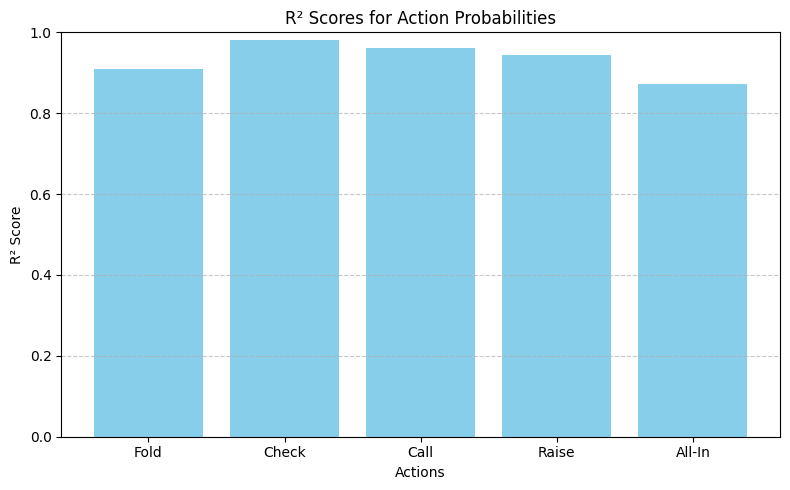

In [14]:

# Plot R² scores
actions = list(r2_scores.keys())
scores = list(r2_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(actions, scores, color='skyblue')
plt.title('R² Scores for Action Probabilities')
plt.xlabel('Actions')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Step 5: Save the Trained Model

Now that the model is trained, we save it using `pickle` so that it can be reused later in testing or deployment without needing to retrain.


In [15]:
# Save the trained model
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as 'trained_model.pkl'")


✅ Model saved as 'trained_model.pkl'
